# Data structures are ways to organize data

# Data structures can be primitive (e.g. lists, numbers, strings):

In [1]:
car_info = ["Black", "Mazda", "Miata"]  # this is a List!
car_make = "Mazda"  # this is a String!
car_model = "Miata"  # this is also a String!
car_color = "Black"  # yet another String!
car_year = 2014  # this is an Integer

# Data structures can be user-defined (to store more complex data):
- This is done through Class definitions. A simple example:

In [2]:
class Car:
    num_wheels = 4
    
    def __init__(self, make, model, color):
        self.make = make
        self.model = model
        self.color = color


<img src="https://intellipaat.com/mediaFiles/2019/03/python10.png">
image source: https://intellipaat.com/

In [3]:
my_car = Car(make=car_make, model=car_model, color=car_color)

In [4]:
print(f"I just bought a {my_car.color} {my_car.make} {my_car.model}!")

I just bought a Black Mazda Miata!


#### In the above example, we have create a data structure that helps us organize what information (attributes) relating to the Car Class.

- The ```__init__()``` is special function that allows us to define instance attributes, by assigning values to a variable name inside this function. Instance attributes are set once an instance gets created. Not as important for this class, but worth pointing out.
- Note the num_wheels variable above the ```__init__()``` function. This is an example of a class attribute, attributes that have the same value for all class instances. By this definition, every Car should have 4 wheels. Also not as important for this class.
- Attributes can be accessed using "dot notation" (important!)

In [5]:
my_car.make

'Mazda'

In [6]:
my_car.num_wheels

4

#### Instance methods are functions inside the class that can be from each class instance:

In [7]:
class Car:
    num_wheels = 4
    
    def __init__(self, make, model, color):
        self.make = make
        self.model = model
        self.color = color
        
    def description(self):
        return f"This is a {my_car.color} {my_car.make} {my_car.model}!"
    
    def set_color(self, new_color):
        self.color = new_color
    
my_car = Car(make=car_make, model=car_model, color=car_color)
my_car.description()

'This is a Black Mazda Miata!'

#### Can we use instance attributes to change instance attributes?

In [8]:
my_car.set_color("Red")
my_car.description()

'This is a Red Mazda Miata!'

In [9]:
import pandas as pd

car_info = ["Mazda", 2014, "Mazda3"]
car_make = "Mazda"
car_model = "Mazda3"
car_year = 2014
car_name = "Zoom zoom"
car_smog_history = pd.DataFrame([['1/1/2014','PASS'],['1/1/2015','PASS'],['1/1/2016','FAIL']], columns=['date','passfail'])

class Car:
    num_wheels = 4
    
    def __init__(self, name, model, year, smog_history):
        self.name = name
        self.model = model
        self.year = year
        self.smog_history = smog_history
        
    def description(self):
        return f"This car's name is \"{my_car.name}\" and it is a {my_car.year} {my_car.model}. It has {my_car.num_wheels} wheels."
    
    def set_name(self, new_name):
        self.name = new_name

my_car = Car(name=car_name, model=car_model, year=car_year, smog_history=car_smog_history)
my_car.smog_history

,date,passfail
0,1/1/2014,PASS
1,1/1/2015,PASS
2,1/1/2016,FAIL


# Now a real example

In [10]:
import numpy as np
import pandas as pd
import scanpy as sc

## Scanpy (and other packages) use the AnnData Class to organize single cell data. 
- This data may span multiple dimensions. In other words, AnnData objects can for a given gene and cell, store counts, normalized counts, cell assignments, etc.
- The example below ([sc.read_10x_mtx()](https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_10x_mtx.html)) returns an instance of an [AnnData](https://anndata.readthedocs.io/en/stable/generated/anndata.AnnData.html#anndata.AnnData) Class (AKA. an AnnData Object).
- Scanpy provides a nice visualization of AnnData's attributes:

<img src="https://falexwolf.de/img/scanpy/anndata.svg">

#### Here's the example. Let's use ```sc.read_10x_mtx()``` which takes in 10X Cellranger output (.mtx) and creates an object (an instance of an AnnData Class) called ```adata```:

In [11]:
adata = sc.read_10x_mtx(
    'public-data/1_programming/data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

#### Similar to car.make and car.model, we can access adata attributes:

In [12]:
# holds variable (gene) names
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [13]:
# holds observation (cells) names
adata.obs

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [14]:
# holds read counts (in a not-super-readable "sparse" matrix format). But you can see it anyway: 
adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

In [15]:
# Simply printing adata on its own returns a nice summary of the instance:
print(adata)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


## Throughout the course of this module, you may encounter functions that modify adata objects directly, or "in place":
- Note that the number of elements shrinks after applying a minimum gene filter function ([sc.pp.filter_cells()](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.filter_cells.html)):

In [16]:
adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

In [17]:
sc.pp.filter_cells(adata, min_genes=1000)

In [18]:
adata.X

<534x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 674618 stored elements in Compressed Sparse Row format>

# If you are unsure which function modifies objects in place (or what the function returns), use the "help" function to retrieve associated documentation

In [19]:
help(sc.pp.filter_cells)  # Alternatively, Googling the function returns its help page: https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.filter_cells.html

Help on function filter_cells in module scanpy.preprocessing._simple:

filter_cells(data: anndata._core.anndata.AnnData, min_counts: Optional[int] = None, min_genes: Optional[int] = None, max_counts: Optional[int] = None, max_genes: Optional[int] = None, inplace: bool = True, copy: bool = False) -> Optional[Tuple[numpy.ndarray, numpy.ndarray]]
    Filter cell outliers based on counts and numbers of genes expressed.
    
    For instance, only keep cells with at least `min_counts` counts or
    `min_genes` genes expressed. This is to filter measurement outliers,
    i.e. “unreliable” observations.
    
    Only provide one of the optional parameters `min_counts`, `min_genes`,
    `max_counts`, `max_genes` per call.
    
    Parameters
    ----------
    data
        The (annotated) data matrix of shape `n_obs` × `n_vars`.
        Rows correspond to cells and columns to genes.
    min_counts
        Minimum number of counts required for a cell to pass filtering.
    min_genes
        Min

### In its documentation, we can see that the function requires a ```data``` parameter (of type ```anndata._core.anndata.AnnData```).

The function also optionally accepts various filter params:
- min_counts
- min_genes
- max_counts
- max_genes

As well as an 'inplace' flag, which tells the function whether or not to modify the AnnData object in place. As we had seen above, 'inplace' defaults to <b>True</b>:

filter_cells(data: anndata._core.anndata.AnnData, min_counts: Optional[int] = None, min_genes: Optional[int] = None, max_counts: Optional[int] = None, max_genes: Optional[int] = None, <b>inplace: bool = True</b>, copy: bool = False) -> Optional[Tuple[numpy.ndarray, numpy.ndarray]]


# To avoid potentially overwriting data within an object, I recommend running each notebook in order!
- This will help to avoid errors, as well as help you keep track of each step in your notebooks.
- Try running the below cells out of order to see how these plots change.

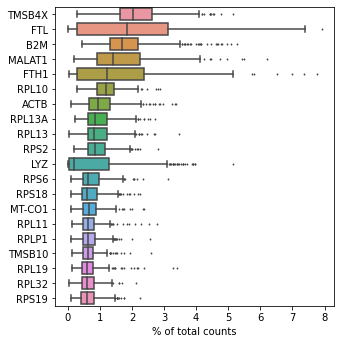

In [20]:
sc.pl.highest_expr_genes(adata, n_top=20, )  # Run first

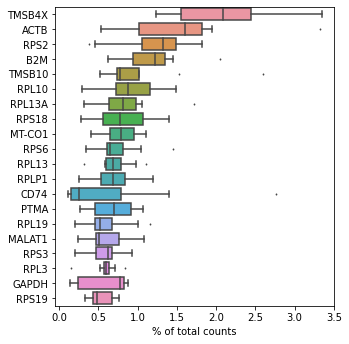

In [23]:
sc.pl.highest_expr_genes(adata, n_top=20, )  # Run third

In [22]:
sc.pp.filter_cells(adata, min_genes=2000)  # Run second